# we will do dim reduction

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("../data/cleaned_heart_data.csv")
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.708333,1.0,0.671053,0.471074,1.0,0.543860,0.0,0.609071,0.0,0,0,0,0,0,1,0,1,1,0
1,0.791667,1.0,0.868421,0.663619,0.0,0.175439,1.0,0.491869,3.0,1,0,0,1,0,1,1,0,0,0
2,0.791667,1.0,0.342105,0.454813,0.0,0.359649,1.0,0.647576,2.0,1,0,0,1,0,1,1,0,0,1
3,0.166667,1.0,0.473684,0.537216,0.0,0.868421,0.0,0.751343,0.0,0,0,1,0,0,0,0,1,0,0
4,0.250000,0.0,0.473684,0.346291,0.0,0.736842,0.0,0.475191,0.0,0,1,0,0,0,1,0,0,0,0


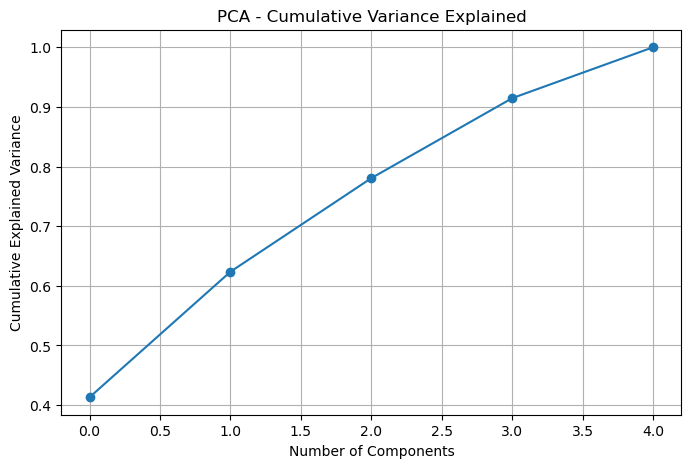

In [11]:
pca = PCA()
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [13]:
## we wil choose 3 components

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df.head()

,PC1,PC2,PC3
0,0.343796,-0.067465,0.134864
1,0.514359,-0.341168,-0.091835
2,0.393768,0.160453,-0.164243
3,0.065769,0.303001,0.537529
4,-0.073165,0.235424,0.319249


In [23]:
to_drop = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[['PC1', 'PC2', 'PC3']] = pca_df[['PC1', 'PC2', 'PC3']].values
df.head()
df.to_csv("../data/pca_heart.csv", index=False)